# Shifting then Tilting HG(0,0)

In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt, cmath as cm, mpmath as mp
from scipy import integrate
from math import inf

In [2]:
#constants
pi = np.pi

#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-5e-3,5e-3,1000,-5e-3,5e-3,1000)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)
a = 100e-6 #shift

lam = params.wavelength #wavelength
w0 = 1e-3 #spot size
k = params.k #wavenumber
z0 = params.z0 #waist location
Zr = params.Zr #rayleigh range



For gap half-width $b$, the right side PD:

\begin{align*}
		C_{nmn'm'}^{R} =&
		\int_{b}^{\infty} dx\int_{-\infty}^{\infty}  dy \;
		\frac{2}{\pi}
		\Big(
			\frac{1}{w_0 \sqrt{1+\big( \frac{z-(x+a)\alpha -z_0}{z_R}\Big)^2}}
			\\&
			\times
			\exp 
			\Big(
			\frac
			{
			-ik((x+a+z\alpha)^{2}		
			+y^{2})
			}
			{2( z-(x+a)\alpha  - z_0 + 
			\frac{z_R^2}{z-(x+a)\alpha -z_0 } ) }-
			\frac{(x+a+z\alpha)^{2}  +y^{2}}
			{
				w_0^2 (1+\big( \frac{z-(x+a)\alpha-z_0}{z_R} \big)^2 )
			}
			\Big)
			\\&
			\times \exp(
			i \arctan( \frac{z-(x+a)\alpha - z_0}{z_R}) )				
			\\&
			\times \exp(
			-ik(x+a)\alpha )	
		\\ &\times
		\Big(
			\frac{1}{w(z)}
			\exp \Big(\frac{ik(x^{2}+y^{2})}{2R_{c}(z)}-
			\frac{x^{2}+y^{2}}{w(z)^{2}} \Big) 
			\exp \Big( -i\Psi(z) \Big)
\end{align*}

In [3]:
def integ_gaps(alpha_lin,gapsize,z,fac):
    
    #pass back integration results for plots
    sol = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):

        f = lambda x, y: ( 
            (2/pi)* 
            1/(w0)* 
            1/(np.sqrt(1 + ( (z*mp.cos(alpha_lin[i])-(x+a)*mp.sin(alpha_lin[i]) -z0) )/Zr) **2)*
                mp.exp
                (
                    (-(1j)*k*
                        ( ( (x+a)*mp.cos(alpha_lin[i]) + z*mp.sin(alpha_lin[i]))**2 + y**2) )
                        /
                        (2 * (z - (x+a) * mp.sin(alpha_lin[i]) )-z0 + Zr**2/(z-(x+a)*mp.sin(alpha_lin[i])-z0) )
                    -
                        (x + a + z*mp.sin(alpha_lin[i]))**2 + y**2
                        /
                        (w0**2*(1+( (z-(x+a)*mp.sin(alpha_lin[i])-z0) /Zr)**2))
                )
                *
                mp.exp
                (
                    (1j)*mp.atan( (z*mp.cos(alpha_lin[i])-(x+a)*mp.sin(alpha_lin[i])-z0) /Zr)
                )
            *
            1/pl.w(z,params)
            *
            mp.exp
            (
                ( (1j)*k*(x**2+y**2)/(2*pl.radius_curvature(z,params)))
                -
                (x**2+y**2)/(pl.w(z,params)**2)
            )
            *
            mp.exp
            (
                -1j* mp.atan( (z-z0) /Zr)
            )
        )
        
        #integrate from gap to PD radius
        cr = mp.quadgl(f, [0,fac*plane.xmax], [plane.ymin*fac,plane.ymax*fac], error = 'true')
        cl = mp.quadgl(f, [plane.xmin*fac,0], [plane.ymin*fac,plane.ymax*fac], error = 'true')
        
        
        print(cr[0],cr[1])
        
        print(cl[0],cl[1])
        #args for phi_r and phi_l
        phi_r = cm.phase(cr[0])
        phi_l = cm.phase(cl[0])
        
        #result in cycles
        sol[i] = 0.5*(phi_r-phi_l)/(2*pi)
    
    return (sol) 

### Plotting phase difference vs. tilt angle for various PD gaps, z, PD radius
a. The aperture size. I suggest we use different aperture radius, from large to the small: 20mm, 10mm, 5mm, 1mm, 0.5mm. And its location I usually choose (0.0,0.0,0.0).

b. The distances to PD. I'd also like to choose different distances, from far to near: 500mm, 200mm, 100mm, 50mm, 10mm, 5mm.

c. The radius of PD. I will choose different sizes: 5mm, 10mm, 1mm, 0.5mm. As size of slits: I usually use the default value in ifoCAD, which is 0.05*PD_Size.

d. The Gaussian reference parameters: waist w0 I usually use 0.5mm and the distance to the waist we usually choose 0. The beam origin I usually use (0.0,0.0,0.0) and choose (1.0, 0.0, 0.0) as the propagation direction. For the measurement Gaussian beam, I think we can use the same parameters.
Should we look at the effect of changing the beam size (reference and/or measurement beam) here? Where do you consider the distance to the waist to be measurered from? Obvious choices seem to be the photodiode, the aperture, or the center of rotation.

e. For the lateral shift, I'd like to choose -1mm,-0.5mm, 0.5mm and 1mm.

f.  The location center of rotation: I think we need to choose different: the aperture center: (0.0,0.0,0.0), (0.0,0.5*aperture_size,0.0).

g. The rotation angle of the measurement beam, we can choose -500μrad~500μrad as usual.

h. The settings for MEM, GBD, usually we just need to choose the mode_order/grid_beam_number, for eg. 120 for MEM and 1001 for GBD. As for other parameters, we can just use the default values in IfoCAD.

(5.64189143303013 - 1.58766922461153e-5j) 1.0e-38
(5.64189421556972 + 1.08777816364419e-5j) 1.0e-37
(5.6418916304748 - 1.23485397523053e-5j) 1.0e-37
(5.64189407761021 + 8.46049687303176e-6j) 1.0e-37
(5.64189182791362 - 8.82038636973348e-6j) 1.0e-37
(5.64189393964707 + 6.04321200439916e-6j) 1.0e-38
(5.6418920253466 - 5.29223224697573e-6j) 1.0e-37
(5.6418938016803 + 3.62592712616781e-6j) 1.0e-37
(5.64189222277372 - 1.76407753260781e-6j) 1.0e-37
(5.6418936637099 + 1.20864233396143e-6j) 1.0e-37
(5.64189242019498 + 1.76407762479439e-6j) 1.0e-37
(5.64189352573588 - 1.20864227659631e-6j) 1.0e-37
(5.64189261761038 + 5.2922330766549e-6j) 1.0e-37
(5.64189338775823 - 3.62592660988171e-6j) 1.0e-37
(5.64189281501991 + 8.82038867439773e-6j) 1.0e-37
(5.64189324977697 - 6.04321057027117e-6j) 1.0e-38
(5.64189301242357 + 1.23485442694468e-5j) 1.0e-37
(5.64189311179209 - 8.46049406214109e-6j) 1.0e-37
(5.64189320982135 + 1.58766997132262e-5j) 1.0e-38
(5.6418929738036 - 1.0877776989868e-5j) 1.0e-38


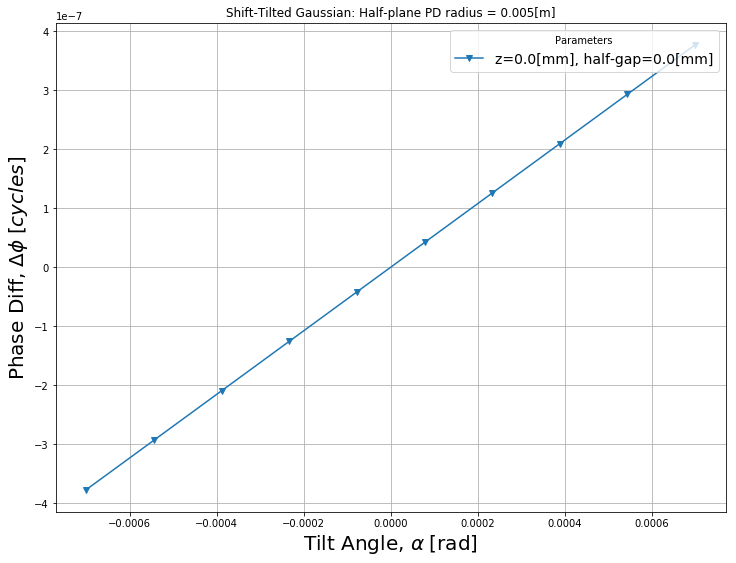

In [4]:
#plotting tilt over ~50 pts
alpha_lin = np.linspace(-700e-6,700e-6, 10)

plt.figure(figsize=(12,9))


######PLOTS

gapsize=0
z=0
fac=1
plt.plot(
        alpha_lin, integ_gaps(alpha_lin,gapsize,z,fac), "-v", 
        label=('z='+str(z*1e3)+'[mm], half-gap='+str(gapsize*1e3)+'[mm]') 
)



#####LABELS
plt.legend(title="Parameters",loc="upper right", fontsize=14)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=20) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'cycles]$', fontsize=20) 

plt.title(r'Shift-Tilted Gaussian: Half-plane PD radius = ' + str(plane.xmax) + '[m]') 

plt.grid()